# Project-1, (a): nanoribbon

In [108]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt

pb.pltutils.use_style()
%matplotlib inline

plt.rcParams.update({'font.size':16, 'font.family':'serif', 'figure.figsize':[16,5]})
#plt.rcParams['figure.figsize']=(16,5)

## Zigzag shape

Text(0.5, 1.0, 'Model system')

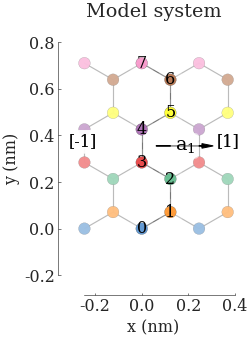

In [109]:
from math import sqrt

def zigzag_nanoribbon():
    #a = 0.24595   # [nm] unit cell length
    #a_cc = 0.142  # [nm] carbon-carbon distance
    d = 0.142  # [nm] carbon-carbon distance
    t = -2.8      # [eV] nearest neighbour hopping

    lat = pb.Lattice(a1=[d*sqrt(3), 0])
    lat.add_sublattices(('0', [0, 0]),
                        ('1', [d*sqrt(3)/2,  d/2]),
                        ('2', [d*sqrt(3)/2,  d*3/2]),
                        ('3', [0,  d*2]),
                        ('4', [0,  d*3]),
                        ('5', [d*sqrt(3)/2,  d*7/2]),
                        ('6', [d*sqrt(3)/2,  d*9/2]),
                        ('7', [0,  d*5])
                       )
    lat.add_hoppings(
        # inside the main cell
        ([0,  0], '0', '1', t),
        ([0,  0], '1', '2', t),
        ([0,  0], '2', '3', t),
        ([0,  0], '3', '4', t),
        ([0,  0], '4', '5', t),
        ([0,  0], '5', '6', t),
        ([0,  0], '6', '7', t),
        # between neighboring cells
        ([-1, 0], '0', '1', t),
        ([1, 0], '2', '3', t),
        ([-1, 0], '4', '5', t),
        ([1, 0], '6', '7', t)
    )
    return lat

lattice = zigzag_nanoribbon()
lattice.plot()
plt.title('Model system')

Value of dos at 0 energy 1.7422411608371775


Text(0.5, 1.0, 'LDOS')

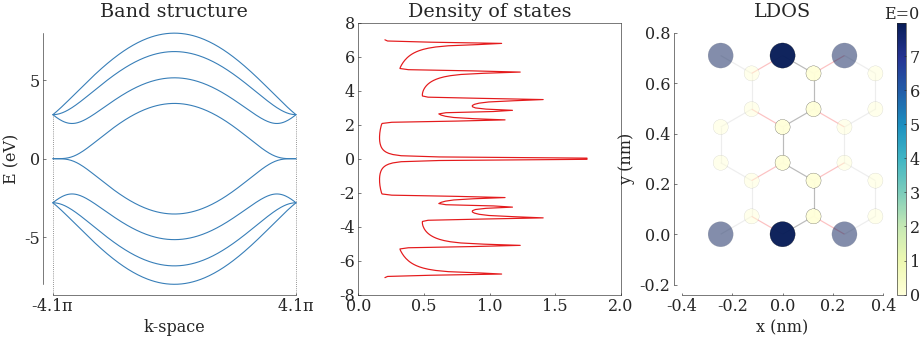

In [110]:
from pybinding.repository import graphene
from math import sqrt, pi

model = pb.Model(
    zigzag_nanoribbon(),
    pb.translational_symmetry(a1=True, a2= False)
)
#Band structure
plt.subplot(131)
solver = pb.solver.lapack(model)
bands = solver.calc_bands(-pi/graphene.a, pi/graphene.a) #in the first Brillouin zone
bands.plot()
#bands.plot(point_labels=[r"$-\pi / a$", r"$\pi / a$"])
plt.title('Band structure')

#Average density of states
kx=np.linspace(-pi/(graphene.a), pi/(graphene.a),200)
#solver = pb.solver.lapack(model)
solver.set_wave_vector([0,0])
lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
data1=lapack_dos.data
for i in range(0,200):
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([kx[i],0])
    lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
    data1+=lapack_dos.data
data1=data1/200
plt.subplot(132)
plt.plot(data1, np.linspace(-7, 7, 200))   # To switch the x and y axis
plt.title('Density of states')
print('Value of dos at 0 energy',data1[100])
#plt.ylim(-0.5, 0.5)
#plt.plot(np.linspace(-7, 7, 100),data1)

#Local density of states
plt.subplot(133)
reference_energy=0
ldos_map = solver.calc_spatial_ldos(energy=reference_energy, broadening=0.05)  # [eV]
ldos_map.plot()
pb.pltutils.colorbar(label='E=%d'%reference_energy)
plt.title('LDOS')
#plt.show()

## Armchair shape

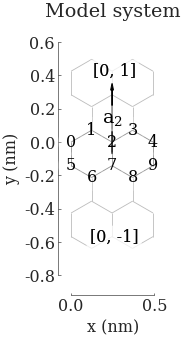

In [111]:
from pybinding.repository import graphene
from math import sqrt

def armchair_nanoribbon():
    #a = 0.24595   # [nm] unit cell length
    #a_cc = 0.142  # [nm] carbon-carbon distance
    d = 0.142  # [nm] carbon-carbon distance
    t = -2.8      # [eV] nearest neighbour hopping

    lat = pb.Lattice(a1=[0,0], a2=[0, d*3])
    lat.add_sublattices(('0', [0*d*sqrt(3)/2, 0]),
                        ('1', [1*d*sqrt(3)/2,  d/2]),
                        ('2', [2*d*sqrt(3)/2, 0]),
                        ('3', [3*d*sqrt(3)/2,  d/2]),
                        ('4', [4*d*sqrt(3)/2,  0]),
                        ('5', [0*d*sqrt(3)/2, -d]),
                        ('6', [1*d*sqrt(3)/2,  -d*3/2]),
                        ('7', [2*d*sqrt(3)/2, -d]),
                        ('8', [3*d*sqrt(3)/2,  -d*3/2]),
                        ('9', [4*d*sqrt(3)/2,  -d])                        
                       )
    lat.add_hoppings(
        # inside the main cell
        ([0,  0], '0', '1', t),
        ([0,  0], '1', '2', t),
        ([0,  0], '2', '3', t),
        ([0,  0], '3', '4', t),
        
        ([0,  0], '5', '6', t),
        ([0,  0], '6', '7', t),
        ([0,  0], '7', '8', t),
        ([0,  0], '8', '9', t),
        
        ([0,  0], '0', '5', t),
        ([0,  0], '2', '7', t),
        ([0,  0], '4', '9', t),
        # between neighboring cells
        ([0, 1], '1', '6', t),
        ([0, 1], '3', '8', t)
    )
    return lat

lattice = armchair_nanoribbon()
lattice.plot()
plt.title('Model system')
plt.show()

Value of dos at 0 energy 0.28853516506295024


Text(0.5, 1.0, 'LDOS')

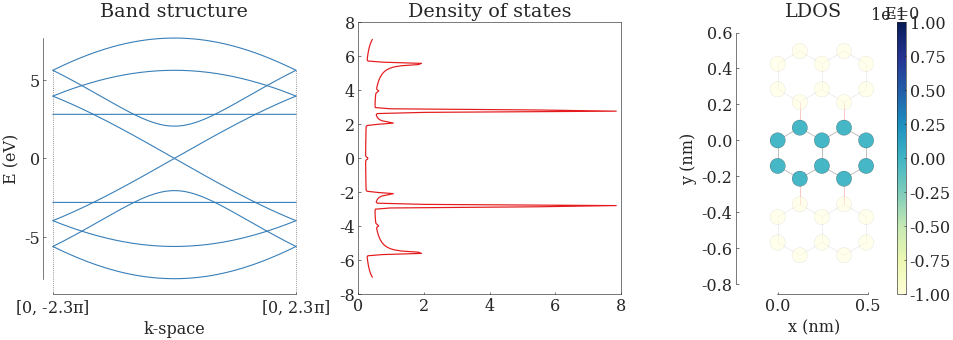

In [112]:
from pybinding.repository import graphene
from math import sqrt, pi

model = pb.Model(
    armchair_nanoribbon(),
    pb.translational_symmetry(a1=False, a2= True)
)

#Band structure
plt.subplot(131)
solver = pb.solver.lapack(model)
k1=[0,-pi/(3*graphene.a/sqrt(3))]
k2=[0, pi/(3*graphene.a/sqrt(3))]
bands = solver.calc_bands(k1,k2) #in the first Brillouin zone
bands.plot()
#bands.plot(point_labels=[r"$-\pi / a$", r"$\pi / a$"])
plt.title('Band structure')

#Average density of states
ky=np.linspace(-pi/(3*graphene.a/sqrt(3)), pi/(3*graphene.a/sqrt(3)),200)
#solver = pb.solver.lapack(model)
solver.set_wave_vector([0,0])
lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
data1=lapack_dos.data
for i in range(0,200):
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([0,ky[i]])
    lapack_dos = solver.calc_dos(np.linspace(-7, 7, 200), broadening=0.05)
    data1+=lapack_dos.data
data1=data1/200
plt.subplot(132)
plt.plot(data1, np.linspace(-7, 7, 200))   # To switch the x and y axis
plt.title('Density of states')
print('Value of dos at 0 energy',data1[100])
#plt.ylim(-0.5, 0.5)
#plt.plot(np.linspace(-7, 7, 100),data1)

#Local density of states
plt.subplot(133)
reference_energy=0
ldos_map = solver.calc_spatial_ldos(energy=reference_energy, broadening=0.05)  # [eV]
ldos_map.plot()
pb.pltutils.colorbar(label='E=%d'%reference_energy)
plt.title('LDOS')
#plt.show()

## Conclusion of (a) :

The zigzag edge bring larger value of DOS at 0 energy than the armchair edge